In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\Nauman\\Documents\\Masters Project'

In [3]:
test_df = pd.read_csv("RF_test_PR.csv")
valid_df = pd.read_csv("RF_valid_test_PR.csv")


In [4]:
test_df.head()

,filename,LP_num,PR_det
0,00014_jpg.rf.06bbf9e1fb6745da771dbaa22c134065.jpg,CAV2889,cav2889
1,vlcsnap-2022-09-21-17h22m33s552_png.rf.25a5730...,PF-1586,pf1586
2,00180_jpg.rf.4ba42fb628bc4779a1d375b7cfe8d34e.jpg,65-8082,658082
3,N245_jpeg.rf.43c97ba5f1ad2f1198f6a167e0864d6b.jpg,MH06AW8929,mh06aw8929
4,N204_jpeg.rf.0235451429f6afb8e3ceb8fdd543400b.jpg,KL13AA6340,kl518111


In [5]:
valid_df.head()

,filename,LP_num,PR_det
0,00072_jpg.rf.04b4e5649a4b9be614bad3b16b13b645.jpg,CAV2889,cav2889
1,Screenshot--312----Copy_png.rf.10ff8ca6e9da749...,GB-7761,gb7761
2,Screenshot--345-_png.rf.060c20eba6d7449f321c0f...,KT-0174,kt0174
3,00514_jpg.rf.21661970dfe53bb05e2d9ece983b0729.jpg,PJ5175,pj5175
4,vlcsnap-2022-09-21-17h10m32s794_png.rf.12c1dca...,PI-2260,pi2260


In [6]:
# merge both dataframes

df = pd.concat([valid_df, test_df], axis=0)

In [7]:
# checking duplicated images 

df['filename'].duplicated().sum()

0

In [8]:
# converting to lowercase string
df['lp_lower'] = df['LP_num'].str.lower()

In [9]:
df

,filename,LP_num,PR_det,lp_lower
0,00072_jpg.rf.04b4e5649a4b9be614bad3b16b13b645.jpg,CAV2889,cav2889,cav2889
1,Screenshot--312----Copy_png.rf.10ff8ca6e9da749...,GB-7761,gb7761,gb-7761
2,Screenshot--345-_png.rf.060c20eba6d7449f321c0f...,KT-0174,kt0174,kt-0174
3,00514_jpg.rf.21661970dfe53bb05e2d9ece983b0729.jpg,PJ5175,pj5175,pj5175
4,vlcsnap-2022-09-21-17h10m32s794_png.rf.12c1dca...,PI-2260,pi2260,pi-2260
...,...,...,...,...
99,00342_jpg.rf.fe4c7fda05a19a10d86cd75a247d5be4.jpg,CAH0554,cah0554,cah0554
100,N173_jpeg.rf.fe178095406d266c61f75b8685d42e18.jpg,KL06H5834,kl06h5834,kl06h5834
101,N25_jpeg.rf.fce5f1bf37d5a84aa5d1d9712f6bf273.jpg,PJ-323-K,pj323k,pj-323-k
102,vlcsnap-2022-09-21-17h32m42s630_png.rf.dbd3f8f...,HO-9655,h09655,ho-9655


In [10]:
# accuracy on exact match on lower

total = len(df)
matches = 0

for ind, row in df.iterrows():
    #print(row)
    if row['PR_det'] == row['lp_lower']:
        matches += 1

accuracy = (matches/total) * 100

print(f'The exact match accuracy is: {accuracy}')

The exact match accuracy is: 43.05555555555556


In [11]:
ex_matches_lower = matches
ex_accuracy_lower = accuracy

In [12]:
df['wo-lp_num'] = df.lp_lower.str.replace('-','')

In [13]:
df

,filename,LP_num,PR_det,lp_lower,wo-lp_num
0,00072_jpg.rf.04b4e5649a4b9be614bad3b16b13b645.jpg,CAV2889,cav2889,cav2889,cav2889
1,Screenshot--312----Copy_png.rf.10ff8ca6e9da749...,GB-7761,gb7761,gb-7761,gb7761
2,Screenshot--345-_png.rf.060c20eba6d7449f321c0f...,KT-0174,kt0174,kt-0174,kt0174
3,00514_jpg.rf.21661970dfe53bb05e2d9ece983b0729.jpg,PJ5175,pj5175,pj5175,pj5175
4,vlcsnap-2022-09-21-17h10m32s794_png.rf.12c1dca...,PI-2260,pi2260,pi-2260,pi2260
...,...,...,...,...,...
99,00342_jpg.rf.fe4c7fda05a19a10d86cd75a247d5be4.jpg,CAH0554,cah0554,cah0554,cah0554
100,N173_jpeg.rf.fe178095406d266c61f75b8685d42e18.jpg,KL06H5834,kl06h5834,kl06h5834,kl06h5834
101,N25_jpeg.rf.fce5f1bf37d5a84aa5d1d9712f6bf273.jpg,PJ-323-K,pj323k,pj-323-k,pj323k
102,vlcsnap-2022-09-21-17h32m42s630_png.rf.dbd3f8f...,HO-9655,h09655,ho-9655,ho9655


In [14]:
# accuracy on exact match on lower and without hyphen (-) 

total = len(df)
matches = 0

for ind, row in df.iterrows():
    if row['PR_det'] == row['wo-lp_num']:
        matches += 1

accuracy = (matches/total) * 100

print(f'The exact match accuracy without hyphen is: {accuracy}')

The exact match accuracy without hyphen is: 88.19444444444444


In [15]:
ex_matches_wo_hyphen = matches
ex_accuracy_wo_hyphen = accuracy

In [16]:
df.loc[df['LP_num'].str.contains('\)') | df['LP_num'].str.contains('\(')]

,filename,LP_num,PR_det,lp_lower,wo-lp_num
12,N141_jpeg.rf.7bc1766815842b67d74ee266342dba46.jpg,HR99EX(TEMP)6037,hr99extemp6,hr99ex(temp)6037,hr99ex(temp)6037


In [17]:
df['wo-lp_num'] = df.lp_lower.replace(['-','\(','\)'], '', regex=True).str.strip()

In [28]:
# matrix to match character wise

rows = list('abcdefghijklmnopqrstuvwxyz') + [str(i) for i in range(10)]
cols = rows.copy() 

matrix = pd.DataFrame(np.zeros((len(rows), len(cols))), columns=cols, index=rows)

        

In [29]:
matrix

,a,b,c,d,e,f,g,h,i,j,...,0,1,2,3,4,5,6,7,8,9
a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
j,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df['perc_match'] = 0

In [20]:
df = df.reset_index(drop=True)
df

,filename,LP_num,PR_det,lp_lower,wo-lp_num,perc_match
0,00072_jpg.rf.04b4e5649a4b9be614bad3b16b13b645.jpg,CAV2889,cav2889,cav2889,cav2889,0
1,Screenshot--312----Copy_png.rf.10ff8ca6e9da749...,GB-7761,gb7761,gb-7761,gb7761,0
2,Screenshot--345-_png.rf.060c20eba6d7449f321c0f...,KT-0174,kt0174,kt-0174,kt0174,0
3,00514_jpg.rf.21661970dfe53bb05e2d9ece983b0729.jpg,PJ5175,pj5175,pj5175,pj5175,0
4,vlcsnap-2022-09-21-17h10m32s794_png.rf.12c1dca...,PI-2260,pi2260,pi-2260,pi2260,0
...,...,...,...,...,...,...
139,00342_jpg.rf.fe4c7fda05a19a10d86cd75a247d5be4.jpg,CAH0554,cah0554,cah0554,cah0554,0
140,N173_jpeg.rf.fe178095406d266c61f75b8685d42e18.jpg,KL06H5834,kl06h5834,kl06h5834,kl06h5834,0
141,N25_jpeg.rf.fce5f1bf37d5a84aa5d1d9712f6bf273.jpg,PJ-323-K,pj323k,pj-323-k,pj323k,0
142,vlcsnap-2022-09-21-17h32m42s630_png.rf.dbd3f8f...,HO-9655,h09655,ho-9655,ho9655,0


In [21]:

for ind, row in df.iterrows():
    org_lp = row['wo-lp_num']
    perd_lp = row['PR_det']
    total = len(org_lp)
    matches = 0
    if perd_lp != 'not found':
        
        for i in range(len(perd_lp)):
            if org_lp[i] == perd_lp[i]:
                matches += 1
            
            matrix[org_lp[i]][perd_lp[i]] += 1

        acc_perc = (matches/total) * 100
        df.iloc[ind,-1] = acc_perc
    
    else:
        df.iloc[ind,-1] = 0
    
    

In [22]:
df

,filename,LP_num,PR_det,lp_lower,wo-lp_num,perc_match
0,00072_jpg.rf.04b4e5649a4b9be614bad3b16b13b645.jpg,CAV2889,cav2889,cav2889,cav2889,100.000000
1,Screenshot--312----Copy_png.rf.10ff8ca6e9da749...,GB-7761,gb7761,gb-7761,gb7761,100.000000
2,Screenshot--345-_png.rf.060c20eba6d7449f321c0f...,KT-0174,kt0174,kt-0174,kt0174,100.000000
3,00514_jpg.rf.21661970dfe53bb05e2d9ece983b0729.jpg,PJ5175,pj5175,pj5175,pj5175,100.000000
4,vlcsnap-2022-09-21-17h10m32s794_png.rf.12c1dca...,PI-2260,pi2260,pi-2260,pi2260,100.000000
...,...,...,...,...,...,...
139,00342_jpg.rf.fe4c7fda05a19a10d86cd75a247d5be4.jpg,CAH0554,cah0554,cah0554,cah0554,100.000000
140,N173_jpeg.rf.fe178095406d266c61f75b8685d42e18.jpg,KL06H5834,kl06h5834,kl06h5834,kl06h5834,100.000000
141,N25_jpeg.rf.fce5f1bf37d5a84aa5d1d9712f6bf273.jpg,PJ-323-K,pj323k,pj-323-k,pj323k,100.000000
142,vlcsnap-2022-09-21-17h32m42s630_png.rf.dbd3f8f...,HO-9655,h09655,ho-9655,ho9655,83.333333


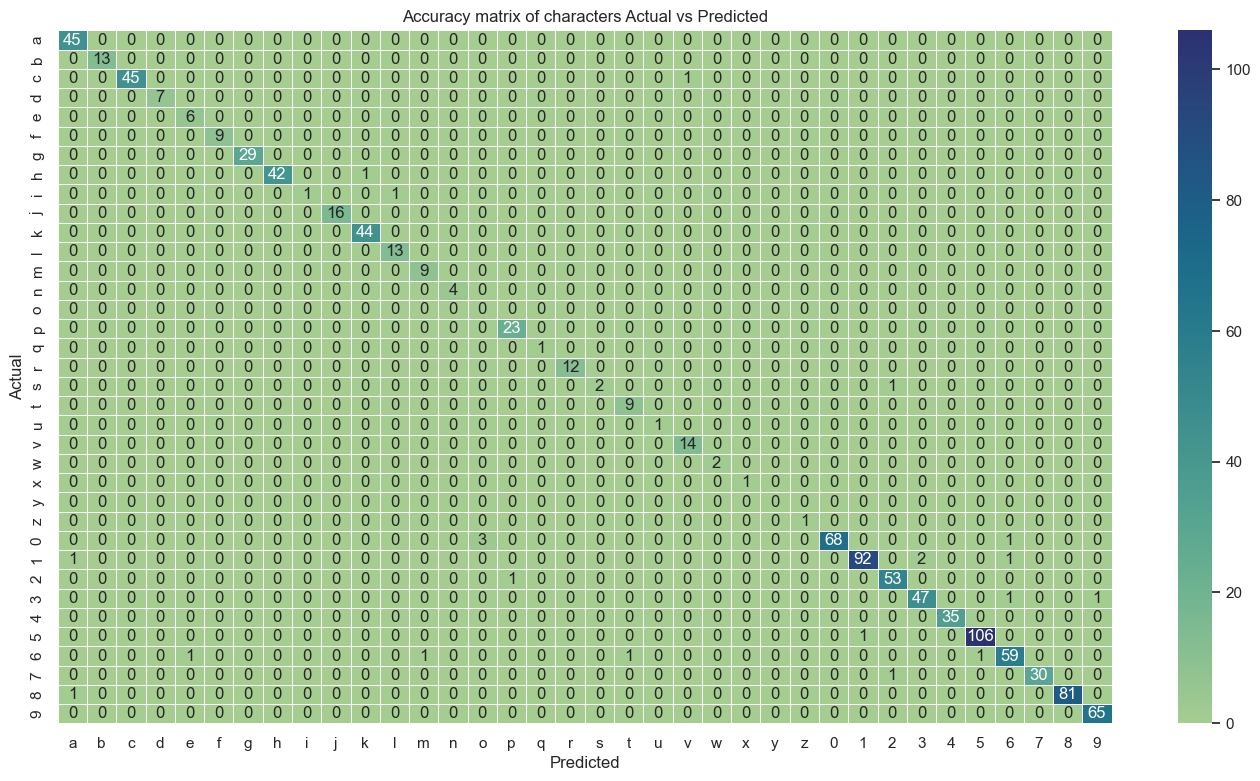

In [23]:
%matplotlib inline


sns.set_theme(style="white")
f, ax = plt.subplots(figsize= (17,9))

sns.heatmap(matrix, annot=True, fmt='.0f', cmap="crest", linewidth=.5)

ax.set_title('Accuracy matrix of characters Actual vs Predicted')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.savefig('accuracy_matrix.png')


In [25]:
character_wise_accuracy = df.perc_match.sum() / len(df)
character_wise_accuracy

96.22184143017476

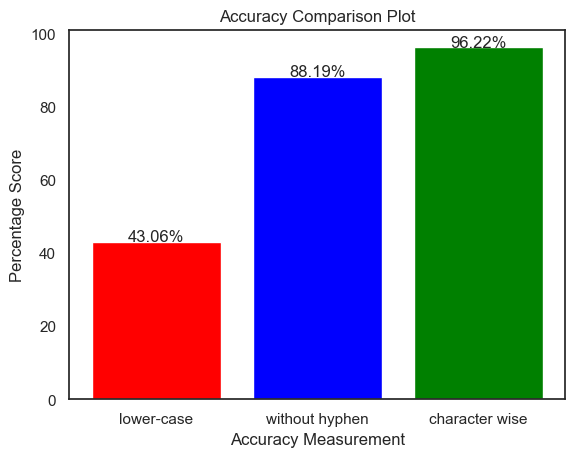

In [26]:
x = ['lower-case', 'without hyphen', 'character wise']
y = [ex_accuracy_lower, ex_accuracy_wo_hyphen, character_wise_accuracy]

plt.title("Accuracy Comparison Plot")
plt.xlabel("Accuracy Measurement")
plt.ylabel("Percentage Score")

colors = ['red', 'blue', 'green']

plt.bar(x, y, color=colors)

for i in range(len(x)):
    plt.text(i, round(y[i], 2) , str(round(y[i], 2))+'%', ha='center') 

plt.savefig('comparison plot.png')
plt.show()

plt.close()